In [16]:
import pandas as pd

with open('pain_predictions', 'r') as f:
    predictions = f.readlines()
    predictions = [x.strip() for x in predictions]
    predictions = [x.split(' ') for x in predictions]
    predictions = pd.DataFrame(predictions)
    predictions['sum'] = predictions.sum(axis=1)
    predictions['sum'].value_counts()

In [17]:
predictions['sum'].value_counts()

sum
100    6677
010    1473
001    1199
Name: count, dtype: int64

No Pain
              precision    recall  f1-score   support

           0       0.33      0.74      0.46      1209
           1       0.95      0.78      0.86      8140

    accuracy                           0.78      9349
   macro avg       0.64      0.76      0.66      9349
weighted avg       0.87      0.78      0.81      9349

Mild Pain
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      8238
           1       0.17      0.23      0.20      1111

    accuracy                           0.78      9349
   macro avg       0.53      0.54      0.54      9349
weighted avg       0.81      0.78      0.79      9349

Pain
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      9251
           1       0.06      0.70      0.11        98

    accuracy                           0.88      9349
   macro avg       0.53      0.79      0.52      9349
weighted avg       0.99      0.88      0.92      93

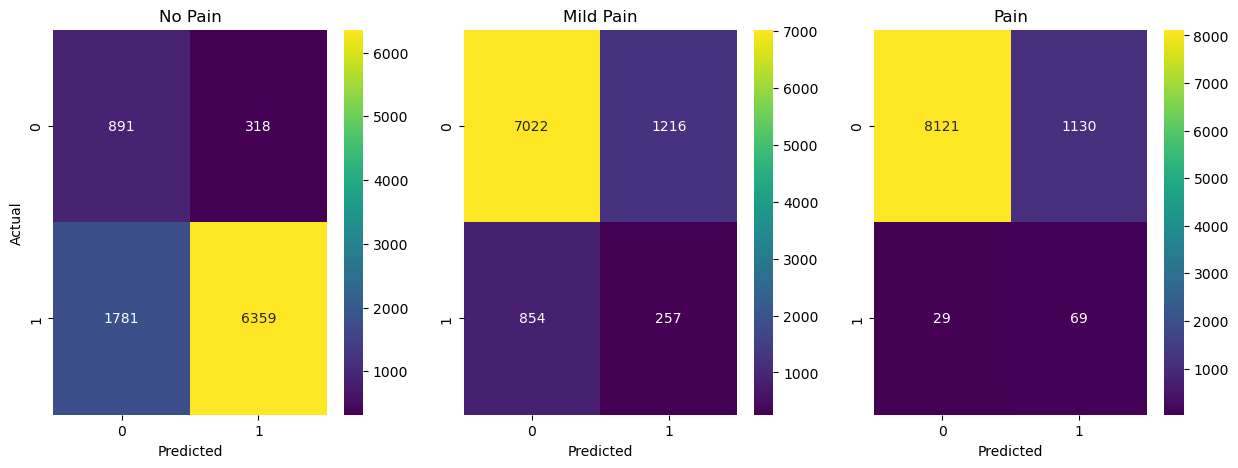

In [18]:
columns = ['No Pain', 'Mild Pain', 'Pain']
with open('pain_predictions', 'r') as pred:
    with open('../data/UNBC/list/UNBC_test_pspi_fold1.txt', 'r') as lab:
        labels = lab.readlines()
        labels = [x.strip() for x in labels]
        labels = [x.split(' ') for x in labels]
        labels = pd.DataFrame(labels, columns=columns)

        predictions = pred.readlines()
        predictions = [x.strip() for x in predictions]
        predictions = [x.split(' ') for x in predictions]
        predictions = pd.DataFrame(predictions, columns=columns)

# print precision, recall, f1-score with classification_report
from sklearn.metrics import classification_report

for i in range(3):
    print(columns[i])
    print(classification_report(labels.iloc[:, i], predictions.iloc[:, i]))

#create confusion matrices with subplots
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax, fig = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    cm = confusion_matrix(labels.iloc[:, i], predictions.iloc[:, i])
    sns.heatmap(cm, annot=True, fmt=".0f", ax=fig[i], cmap="viridis")
    fig[i].set_title(columns[i])
    fig[i].set_xlabel('Predicted')
fig[0].set_ylabel('Actual')

plt.show()